In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import treinar_modelo_tree,plot_matrix_confusao,cross_validation,metricas_modelos,plot_feature_importance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestClassifier,ExtraTreesClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
path_data_final = 'data/processing/mergin_data_final.parquet'
base_final_dev = pd.read_parquet(path_data_final)

In [3]:
col_treino = ['VALOR_A_PAGAR',
              'TAXA',
              'QTD_DIAS_EMISSAO_VENCIMENTO',
              'RENDA_MES_ANTERIOR',
              'NO_FUNCIONARIOS',
              'DDD',
              'FLAG_PF',
              'SEGMENTO_INDUSTRIAL',
              'DOMINIO_EMAIL',
              'PORTE',
              'CEP_2_DIG'
]
num_trees = [15, 20, 30, 40, 50, 100,150,200,300,400,500]

In [4]:
X = base_final_dev[col_treino]
y = base_final_dev['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30,random_state=10)

In [5]:
parametros = {
    'oob_score':True, 
    'random_state':42, 
    'warm_start':True,
    'bootstrap':True,
    'n_jobs':-1
}

In [6]:
clf_rf = RandomForestClassifier(**parametros)
clf_et = ExtraTreesClassifier(**parametros)
clf_xgb = XGBClassifier(**parametros,learning_rate=0.7)

In [7]:
metricas_rf,y_pred_rf   = treinar_modelo_tree(clf_rf,X_train,y_train,X_test,y_test,num_trees)
metricas_et,y_pred_et   = treinar_modelo_tree(clf_et,X_train,y_train,X_test,y_test,num_trees)
metricas_xgb,y_pred_xgb = treinar_modelo_tree(clf_xgb,X_train,y_train,X_test,y_test,num_trees)

/home/vitor/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/vitor/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/vitor/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/home/vitor/.local/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


[09:33:22] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:23] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:23] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:24] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:25] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:26] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:30] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:35] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:33:44] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "war

In [8]:
metricas_xgb

,n_trees,oob,acuracia_train,acuracia_test
0,15.0,NaN,0.960142,0.950916
1,20.0,NaN,0.963759,0.951778
2,30.0,NaN,0.968289,0.954092
3,40.0,NaN,0.973091,0.954954
4,50.0,NaN,0.976494,0.955861
5,100.0,NaN,0.986507,0.956859
6,150.0,NaN,0.991756,0.957358
7,200.0,NaN,0.995703,0.957766
8,300.0,NaN,0.998561,0.957449
9,400.0,NaN,0.998892,0.958356


In [9]:
metricas_rf

,n_trees,oob,acuracia_train,acuracia_test
0,15.0,0.046410,0.997609,0.959762
1,20.0,0.044932,0.997764,0.958583
2,30.0,0.043902,0.998464,0.960034
3,40.0,0.042930,0.998756,0.960579
4,50.0,0.042269,0.998814,0.960216
5,100.0,0.040985,0.998970,0.960125
6,150.0,0.041121,0.998989,0.960670
7,200.0,0.040713,0.998989,0.960624
8,300.0,0.040771,0.998989,0.960579
9,400.0,0.040363,0.998989,0.960760


In [10]:
clf_rf = RandomForestClassifier(**parametros)
clf_et = ExtraTreesClassifier(**parametros)
clf_xgb = XGBClassifier(**parametros,learning_rate=0.7)

metricas_rf,y_pred_rf   = treinar_modelo_tree(clf_rf,X_train,y_train,X_test,y_test,[200])
metricas_et,y_pred_et   = treinar_modelo_tree(clf_et,X_train,y_train,X_test,y_test,[150])
metricas_xgb,y_pred_xgb = treinar_modelo_tree(clf_xgb,X_train,y_train,X_test,y_test,[400])

[09:34:30] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.



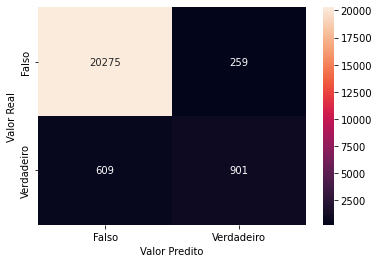

In [11]:
plot_matrix_confusao(y_test,y_pred_rf)

In [12]:
score_rf,cr_rf  = metricas_modelos(y_test,y_pred_rf)
print(cr_rf)
score_rf

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20534
           1       0.78      0.60      0.67      1510

    accuracy                           0.96     22044
   macro avg       0.87      0.79      0.83     22044
weighted avg       0.96      0.96      0.96     22044



,accuracy,precision,recall,f1,auc
0,0.960624,0.776724,0.596689,0.674906,0.792038


In [31]:
import numpy as np

In [13]:
scores_rf,predict_rf,info_valid_rf = cross_validation(clf_rf,X_train,y_train,30)

In [14]:
scores_rf.mean()

0.9595003135443207

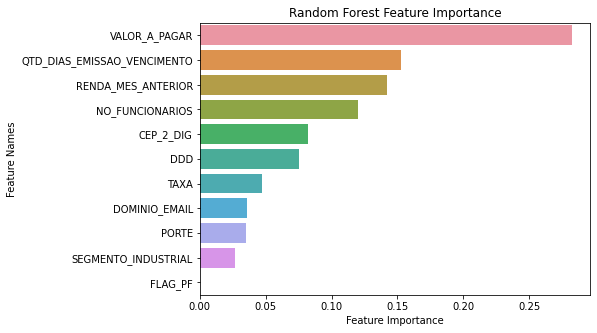

In [41]:
plot_feature_importance(clf_rf.feature_importances_,X_test.columns,'Random Forest ')

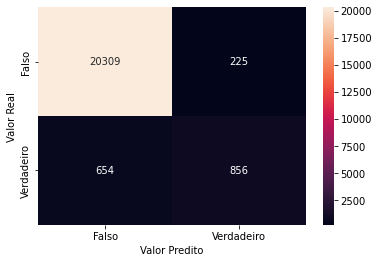

In [15]:
plot_matrix_confusao(y_test,y_pred_et)

In [16]:
score_et,cr_et  = metricas_modelos(y_test,y_pred_et)
print(cr_et)
score_et

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20534
           1       0.79      0.57      0.66      1510

    accuracy                           0.96     22044
   macro avg       0.88      0.78      0.82     22044
weighted avg       0.96      0.96      0.96     22044



,accuracy,precision,recall,f1,auc
0,0.960125,0.791859,0.566887,0.660749,0.777965


In [17]:
scores_et,predict_et,info_valid_et = cross_validation(clf_et,X,y,30)

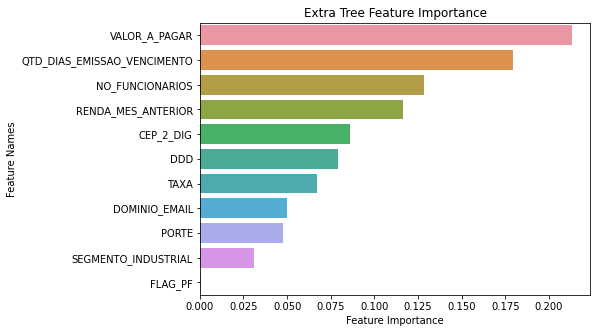

In [40]:
plot_feature_importance(clf_et.feature_importances_,X_test.columns,'Extra Tree ')

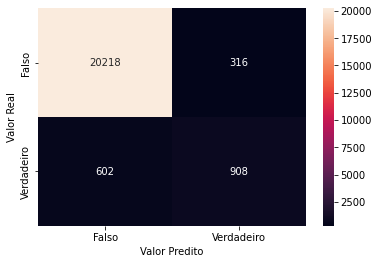

In [18]:
plot_matrix_confusao(y_test,y_pred_xgb)

In [19]:
score_xgb,cr_xgb  = metricas_modelos(y_test,y_pred_xgb)
print(cr_xgb)
score_xgb

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     20534
           1       0.74      0.60      0.66      1510

    accuracy                           0.96     22044
   macro avg       0.86      0.79      0.82     22044
weighted avg       0.96      0.96      0.96     22044



,accuracy,precision,recall,f1,auc
0,0.958356,0.74183,0.601325,0.664228,0.792968


In [20]:
scores_xgb,predict_xgb,info_valid_xgb = cross_validation(clf_xgb,X,y,30)

[09:54:05] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:54:22] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:54:36] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:54:51] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:55:05] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:55:20] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:55:35] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:55:50] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "warm_start" } are not used.

[09:56:05] WARNING: ../src/learner.cc:767: 
Parameters: { "bootstrap", "oob_score", "war

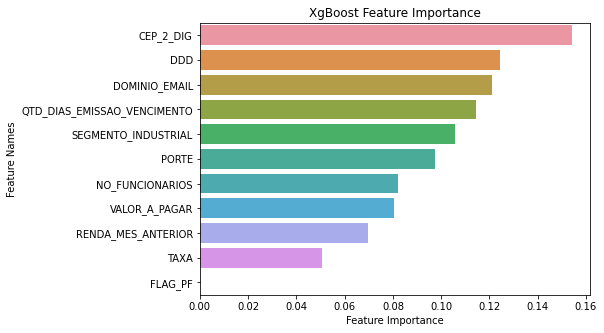

In [39]:
plot_feature_importance(clf_xgb.feature_importances_,X_test.columns,'XgBoost ')